## Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network
    f. Plot the training loss and accuracy

In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
X_train  = X_train/255.0
X_test = X_test/255.0

In [4]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
    Dense(64,activation ='relu',input_shape=(3072,)),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 199,082
Trainable params: 199,082
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [9]:
epochs = 10
H = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/10
1563/1563 [==============================] - 25s 15ms/step - loss: 1.9350 - accuracy: 0.2913 - val_loss: 1.8154 - val_accuracy: 0.3409
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7822 - accuracy: 0.3564 - val_loss: 1.7378 - val_accuracy: 0.3683
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7304 - accuracy: 0.3753 - val_loss: 1.6942 - val_accuracy: 0.3814
Epoch 4/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.7006 - accuracy: 0.3879 - val_loss: 1.7041 - val_accuracy: 0.3781
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.6845 - accuracy: 0.3902 - val_loss: 1.6915 - val_accuracy: 0.3899
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.6727 - accuracy: 0.3978 - val_loss: 1.6522 - val_accuracy: 0.4033
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6574 - accuracy: 0.4027 - val_loss: 1.6626 -

In [10]:
from sklearn.metrics import classification_report
predition = model.predict(X_test)
print(classification_report(y_test,predition.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.51      0.41      0.45      1000
           1       0.58      0.41      0.48      1000
           2       0.31      0.17      0.22      1000
           3       0.26      0.28      0.27      1000
           4       0.31      0.26      0.28      1000
           5       0.47      0.25      0.32      1000
           6       0.34      0.71      0.46      1000
           7       0.45      0.48      0.46      1000
           8       0.46      0.61      0.53      1000
           9       0.50      0.50      0.50      1000

    accuracy                           0.41     10000
   macro avg       0.42      0.41      0.40     10000
weighted avg       0.42      0.41      0.40     10000



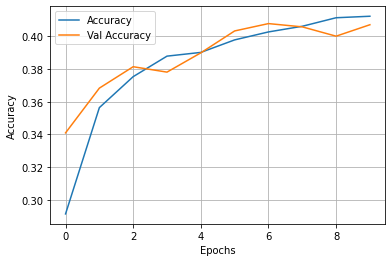

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'Accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

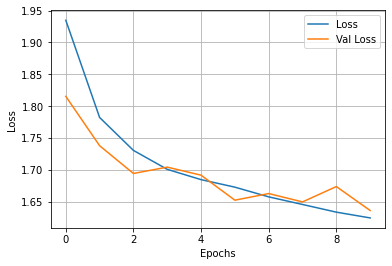

In [12]:
plt.plot(range(0,epochs),H.history['loss'],label = 'Loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();